# Importeer librarys

In [65]:
# Importeer gym dingen
import gym
from gym import Env
from gym.spaces import Discrete, Box, Tuple, Dict, MultiBinary, MultiDiscrete

# Import helpers
import numpy as np
import random 
import os

# Import stable baselines dingen
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.envs import SimpleMultiObsEnv

# Import overige librarys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Typer van spaces

In [2]:
Discrete(9).sample()

1

In [3]:
t = Tuple((Discrete(2), Box(0, 0, shape = (2, 2), dtype = np.int64))).sample()
t

(0,
 array([[0, 0],
        [0, 0]]))

In [4]:
doos = Box(0, 0, shape = (2, 2), dtype = np.int64).sample()
doos[t[0]][t[1]] = 1
doos

array([[1, 0],
       [0, 0]])

In [5]:
Box(0, 1, shape = (2, 2)).sample()

array([[0.9603642 , 0.02308189],
       [0.83633417, 0.25684974]], dtype=float32)

In [6]:
Tuple((Discrete(3), Box(0,1, shape = (3,)))).sample()

(1, array([0.67410696, 0.9577671 , 0.94103867], dtype=float32))

In [7]:
Dict({'height':Discrete(2), 'speed':Box(0,100, shape = (1,))}).sample()

OrderedDict([('height', 0), ('speed', array([94.76873], dtype=float32))])

In [8]:
MultiBinary(4).sample()

array([0, 1, 0, 1], dtype=int8)

In [9]:
MultiDiscrete([5, 5]).sample()

array([4, 4])

In [10]:
Box(low = 0, high = 100, shape = (1,)).sample()

array([42.244446], dtype=float32)

# Functie voor het maken van een matrix

In [11]:
def matrix_maker(depth, width, height):
    matrix = depth * [0]
    if width > 1:
         matrix = [matrix] * width
    if height > 1:
         matrix = [matrix] * height
    return matrix

In [12]:
matrix_maker(3, 3, 1)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# Env voor containers

In [13]:
class Containers(Env):
    
    def __init__(self):
        self.action_space = MultiDiscrete([5,5])
        self.observation_space = Box(0, 0, shape = (5, 5), dtype = np.int64)
        matrix = [[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]]
        self.state = matrix
        self.game_length = 25
    
    def step(self, action):
        
        self.game_length -= 1
        
        if self.state[action[0]][action[1]] != 1:
            self.state[action[0]][action[1]] = 1
            reward = 1
        else:
            reward = -1
            
        
        
        if self.game_length <= 0:
            done = True
        else:
            done = False
            
        info = {}
        
        #print(self.state)
        
        return self.state, reward, done, info
    
    def render(self):
        pass
    
    def reset(self):
        self.game_length = 25
        self.state = [[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]]
        return self.state
    

In [14]:
# Matrix vermenigvuldiging 

In [15]:
env = Containers()

In [16]:
t = env.action_space.sample()

In [17]:
env.observation_space.sample()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

# Test enviroment

In [18]:
episodes = 20
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{}, Score:{}'.format(episode, score))
env.close()

Episode:1, Score:3
Episode:2, Score:9
Episode:3, Score:7
Episode:4, Score:7
Episode:5, Score:1
Episode:6, Score:7
Episode:7, Score:5
Episode:8, Score:7
Episode:9, Score:5
Episode:10, Score:7
Episode:11, Score:11
Episode:12, Score:1
Episode:13, Score:7
Episode:14, Score:11
Episode:15, Score:7
Episode:16, Score:11
Episode:17, Score:1
Episode:18, Score:5
Episode:19, Score:5
Episode:20, Score:1


# PPO Model trainen

In [23]:
log_path = os.path.join('Training', 'Logs')
model = PPO('MlpPolicy', env, verbose = 1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [24]:
model.learn(total_timesteps=20000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 7.07     |
| time/              |          |
|    fps             | 565      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | 7.4         |
| time/                   |             |
|    fps                  | 426         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009928086 |
|    clip_fraction        | 0.06        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.21       |
|    explained_variance   | -0.0652     |
|    learning_rate        | 0.

# A2C Model trainen

In [25]:
log_path = os.path.join('Training', 'Logs')
model2 = A2C('MlpPolicy', env, verbose = 1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [26]:
model2.learn(total_timesteps=20000)

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 7.6      |
| time/                 |          |
|    fps                | 300      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -3.21    |
|    explained_variance | 0.0291   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -5.77    |
|    value_loss         | 3.59     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 6.75     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 8.48     |
| time/                 |          |
|    fps                | 306      |
|    iterations         | 1500     |
|    time_elapsed       | 24       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -3.16    |
|    explained_variance | 0.355    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1499     |
|    policy_loss        | 3.63     |
|    value_loss         | 1.71     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 8.58     |
| time/                 |          |
|    fps                | 306      |
|    iterations         | 1600     |
|    time_elapsed       | 26       |
|    total_timesteps    | 8000     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 9.8      |
| time/                 |          |
|    fps                | 306      |
|    iterations         | 2900     |
|    time_elapsed       | 47       |
|    total_timesteps    | 14500    |
| train/                |          |
|    entropy_loss       | -2.89    |
|    explained_variance | -0.0372  |
|    learning_rate      | 0.0007   |
|    n_updates          | 2899     |
|    policy_loss        | -3.79    |
|    value_loss         | 1.89     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25       |
|    ep_rew_mean        | 9.92     |
| time/                 |          |
|    fps                | 306      |
|    iterations         | 3000     |
|    time_elapsed       | 48       |
|    total_timesteps    | 15000    |
| train/                |          |
|

# Modellen vergelijken

In [109]:
PPO_results = [7.07, 7.4, 8.12, 7.78, 8.5, 9.16, 9.14, 9.24, 9.26, 9.44]
PPO_time = [3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
A2C_results = [7.6, 6.75, 6.63, 6.85, 6.86, 6.94, 7.34, 7.48, 7.52, 8.18, 8.24, 8.08, 8.44, 8.64, 
              8.48, 8.58, 9.06, 8.88, 8.78, 8.62, 8.5, 8.42, 8.8, 9.12, 9.38, 9.68, 9.78, 9.86, 9.8, 
              9.92, 9.66, 9.7, 9.58, 9.8, 9.66]
A2C_time = [1, 3, 4, 6, 8, 9, 11, 13, 14, 16, 17, 19, 21, 22, 24, 26, 27, 29, 30, 32, 34, 35, 
            37, 39, 40, 42, 44, 45, 47, 48, 50, 52, 53, 55, 57]

In [110]:
A2C_Learning_curve = pd.DataFrame()
PPO_Learning_curve = pd.DataFrame()

In [111]:
A2C_Learning_curve["time"] = A2C_time
A2C_Learning_curve["mean reward"] = A2C_results
A2C_Learning_curve

,time,mean reward
0,1,7.60
1,3,6.75
2,4,6.63
3,6,6.85
4,8,6.86
5,9,6.94
6,11,7.34
7,13,7.48
8,14,7.52
9,16,8.18


In [113]:
PPO_Learning_curve["time"] = PPO_time
PPO_Learning_curve["mean reward"] = PPO_results
PPO_Learning_curve

,time,mean reward
0,3,7.07
1,9,7.40
2,15,8.12
3,21,7.78
4,27,8.50
5,33,9.16
6,39,9.14
7,45,9.24
8,51,9.26
9,57,9.44


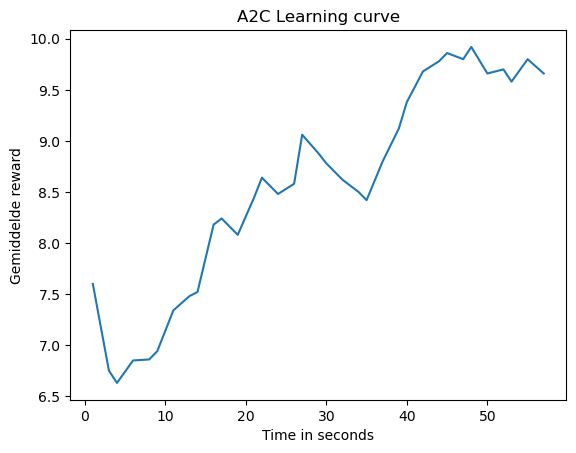

In [116]:
fig = sns.lineplot(x = 'time', y = 'mean reward', data = A2C_Learning_curve)
fig.set(xlabel='Time in seconds', ylabel='Gemiddelde reward')
plt.title("A2C Learning curve")
plt.show()

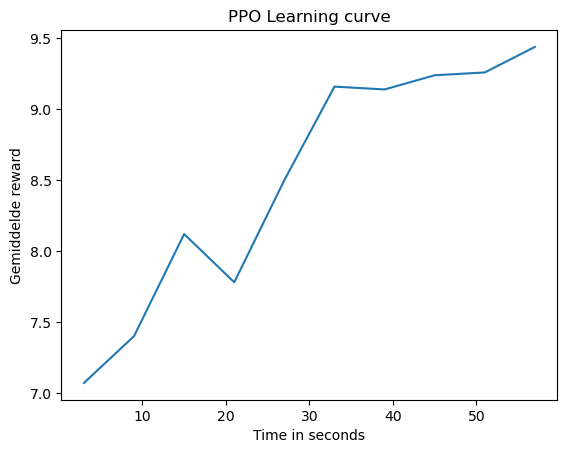

In [117]:
fig = sns.lineplot(x = 'time', y = 'mean reward', data = PPO_Learning_curve)
fig.set(xlabel='Time in seconds', ylabel='Gemiddelde reward')
plt.title("PPO Learning curve")
plt.show()